<img src="fga.png" width="1200" height="400">


<h1><center>Escolha de Ativos com K-Means para Swing Trade </center></h1>

A presente atividade prática abordará a clusterização k-means entre outros aspectos fundamentais para a formação de uma carteira de ativos.


<ul>
    <li> <b>Universidade de Brasília - UnB</b> </li>
    <li> <b>Campus UnB Gama</b> </li>
    <li> <b>Disciplina: Processamento Digital de Sinais Financeiros</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/" a/>
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li>
</ul>


<div id="k_means">
    <h2>7) Clusterização K-Means</h2>
</div>


A técnica de aprendizado de maquina denominada <b>K-Means</b> é um das mais populares de "clustering" não supervisionado. O K significa os centróides que são aplicados para definir os clusters. Um ponto é considerado em um cluster específico se estiver mais próximo do centróide desse cluster do que de qualquer outro centróide.
Algoritmo K-Means: 

<ol> &emsp;
  <li>Inicia $k$ centroides ($\normalsize \mu_1,\mu_2,....,\mu_k \in \mathbb{R}$), aleatoriamente </li> &emsp;
  <li>Para todos $i$, determine $\normalsize  c^{(i)}:= argmin_j ||x^{(i)} - \mu_j ||^2$</li> &emsp;
  <li>Para todos $j$, determine $\normalsize  \mu_j:= \frac{\sum_{i=1}^{m}1\{c^{(i)}=j\}x^{(i)} }{\sum_{i=1}^{m}1\{c^{(i)}=j\}} $</li> &emsp;
  <li>Repita os procedimentos 2 e 3 até convergir! </li> &emsp;



</ol>
O exemplo será aplicado nos ativos do Índice Amplo B3 &emsp;



In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 
from pandas_datareader import data
from tqdm import tqdm

start_date = '2019-08-24'
end_date = '2020-08-24'


df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBRA&idioma=pt-br')
Symbols=[sy+'.SA' for sy in list(df[0]['Código'].values)]


output = None
sym=[]
for sy in tqdm(Symbols): 
    try: 
        stock=data.DataReader(sy, 'yahoo',  start_date,  end_date)["Adj Close"]
        
        if output is None:
            df = stock
            output = df    
            sym.append(sy[:-3])
        else:
            df = stock
            output=pd.concat([output,df],axis=1)     
            sym.append(sy[:-3])
    except:
        print("Erro "+sy)
output.columns=sym
output.head()

100%|██████████| 158/158 [02:36<00:00,  1.01it/s]

Erro Quantidade Teórica Total  Redutor.SA


,AALR3,ABCB4,ABEV3,ALPA4,ALSO3,ALUP11,AMAR3,ANIM3,ARZZ3,AZUL4,...,USIM5,VALE3,VIVA3,VIVT4,VLID3,VULC3,VVAR3,WEGE3,WIZS3,YDUQ3
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-26,17.693655,17.484203,17.627039,23.164232,35.500000,24.744507,7.92,19.600000,45.617691,46.000000,...,7.074133,41.695152,NaN,47.244770,11.060385,6.64,6.48,21.340221,10.289542,30.259590
2019-08-27,17.832506,17.562258,17.704992,24.092796,35.990002,24.636065,8.18,19.900000,45.707455,45.980000,...,6.935424,42.201729,NaN,47.753281,10.544615,6.75,6.85,21.468954,10.417476,29.641247
2019-08-28,18.159800,17.757395,17.685503,24.462227,35.990002,24.862806,8.10,20.700001,45.876995,46.540001,...,6.945333,42.357597,NaN,48.261784,10.802501,6.83,7.00,21.874964,10.143332,29.974957
2019-08-29,18.844139,17.854961,18.075266,24.861610,36.200001,24.744507,8.25,21.000000,47.732025,48.549999,...,7.579428,43.935780,NaN,48.298763,11.060385,7.14,7.31,22.181946,10.198160,31.751467
2019-08-30,18.992908,17.942774,18.240915,24.741796,37.590000,25.621901,8.71,21.000000,49.347691,47.099998,...,7.827122,44.393646,NaN,49.620876,11.022180,7.29,7.73,22.280975,10.938350,30.877934


['Erros', 342, 'Ativos', 157]

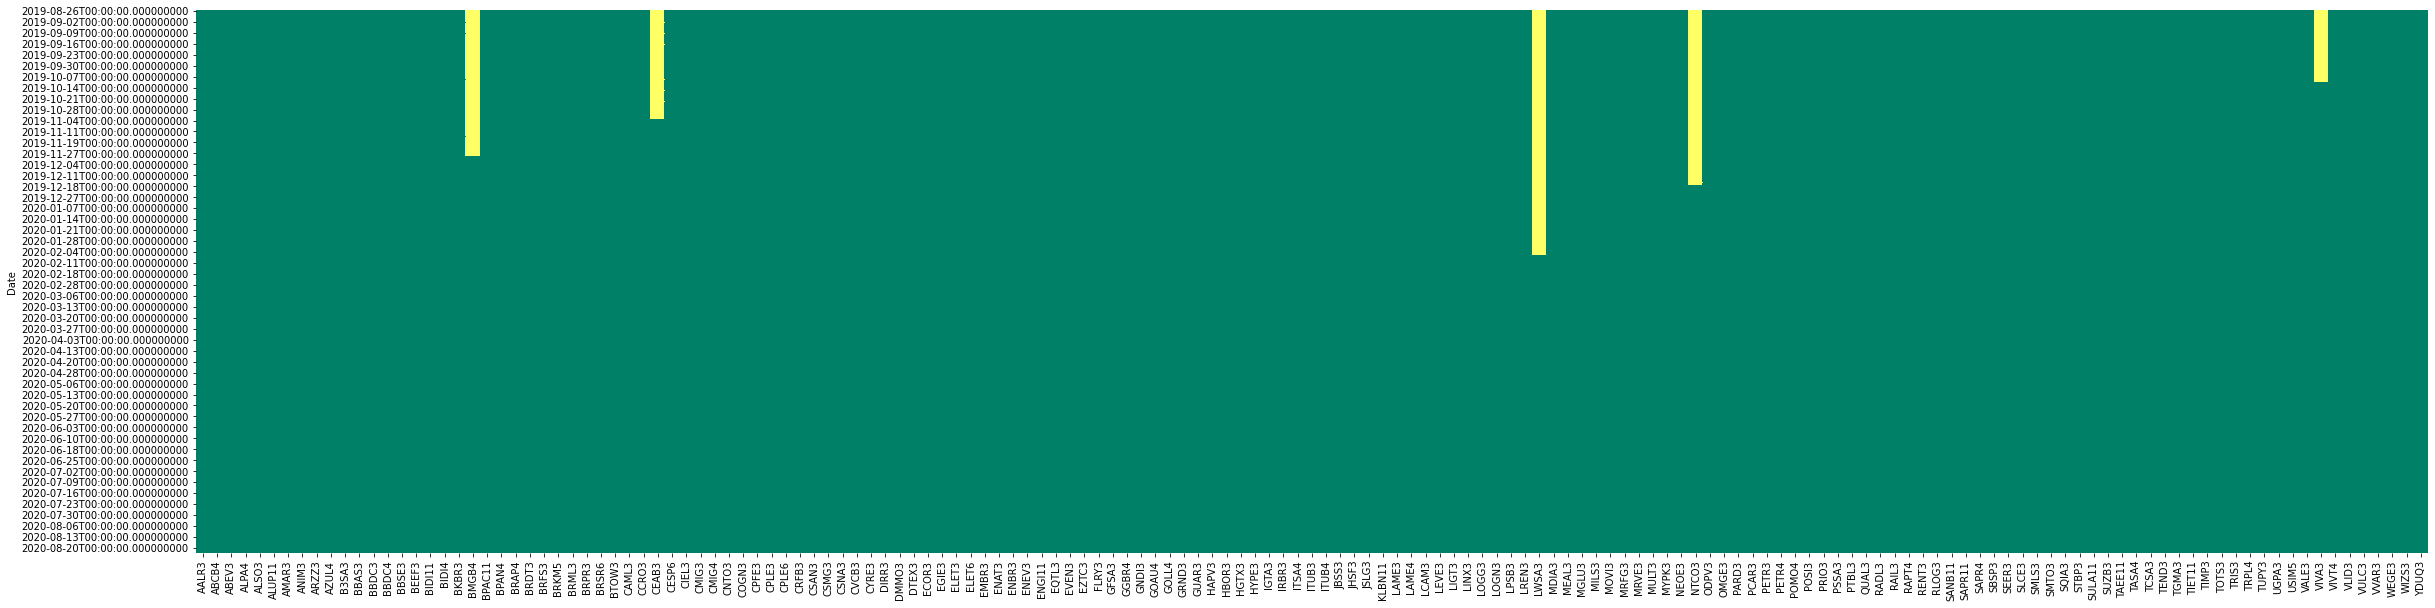

In [2]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

['Erros', 0, 'Ativos', 152]

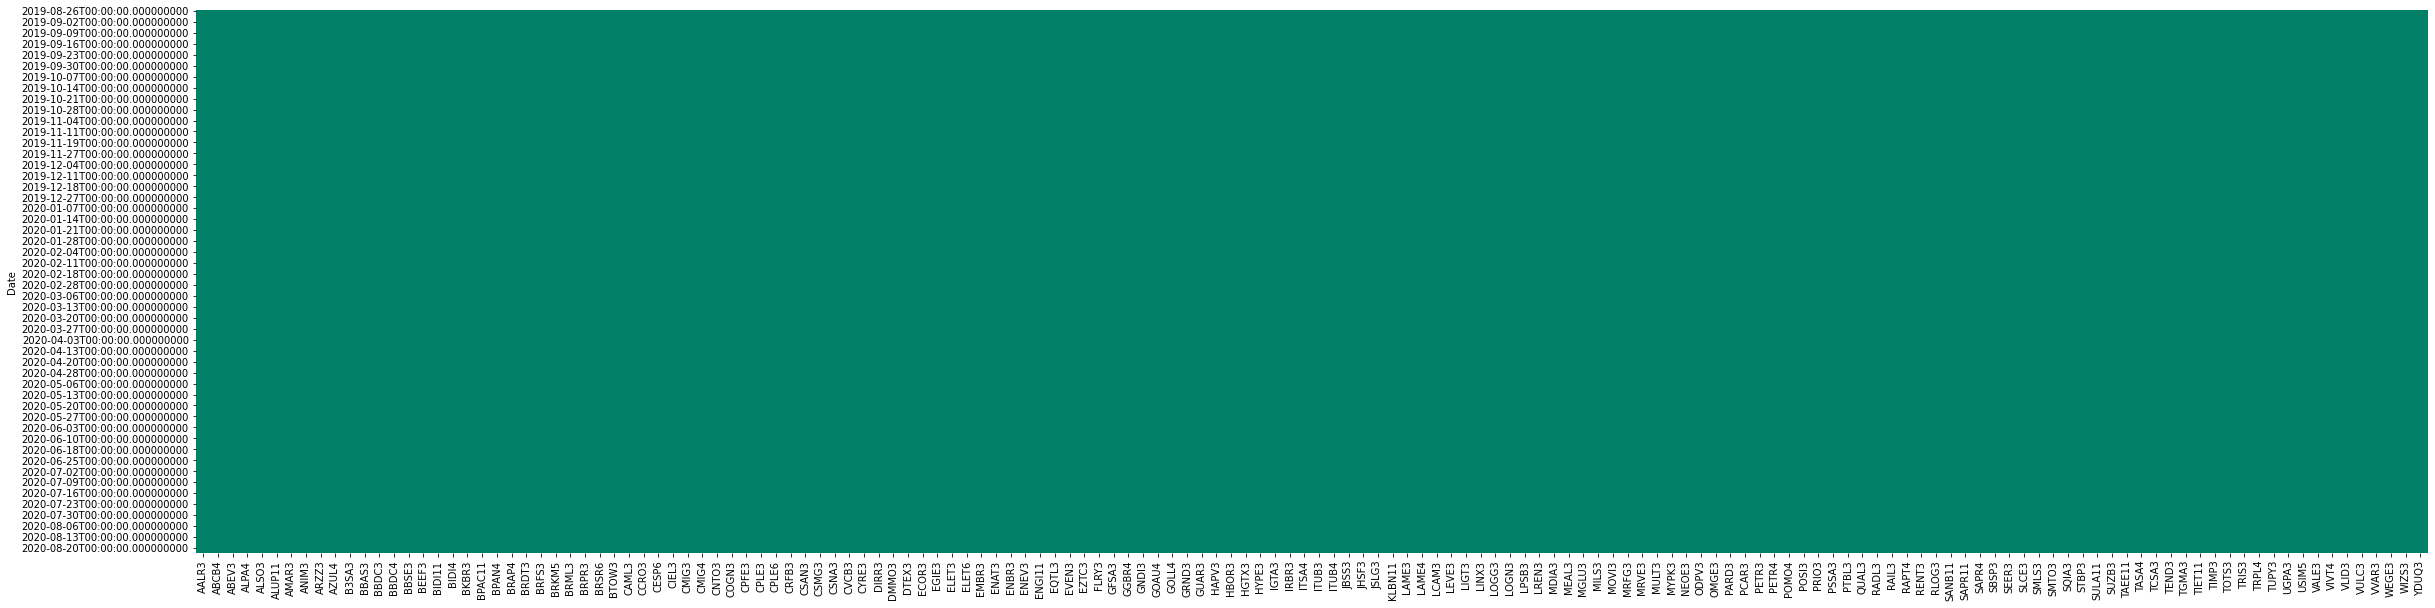

In [3]:
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

Ativos com Melhor Relação em Cada Cluster: ['WEGE3', 'TCSA3', 'HBOR3']


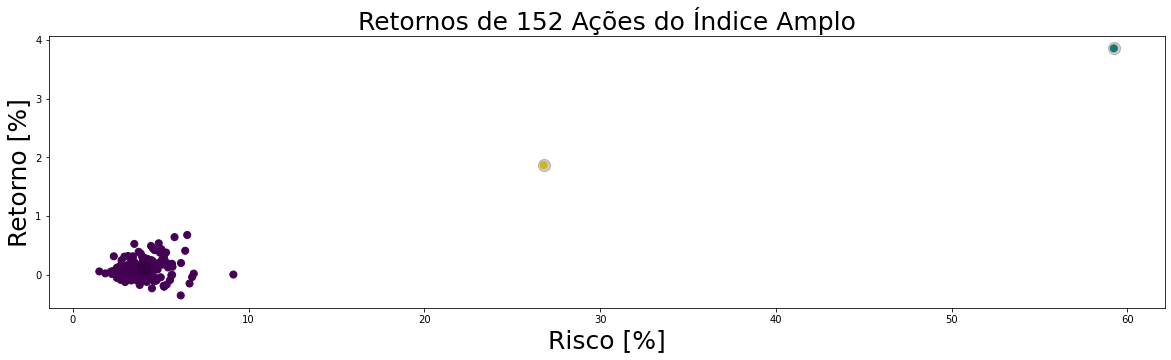

In [4]:
%matplotlib inline 
from sklearn.cluster import KMeans

retornos=100*output.pct_change()
stocks=retornos.columns

X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])

N=3

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

In [5]:
retornos.mean().sort_values().tail()

BTOW3    0.533685
VVAR3    0.639358
PRIO3    0.675869
HBOR3    1.870129
TCSA3    3.861193
dtype: float64

In [6]:
retornos.std().sort_values().tail()

AZUL4     6.802031
GOLL4     6.895352
DMMO3     9.154014
HBOR3    26.844897
TCSA3    59.350437
dtype: float64

Ativos com Melhor Relação em Cada Cluster: ['WEGE3', 'MGLU3', 'VVAR3']


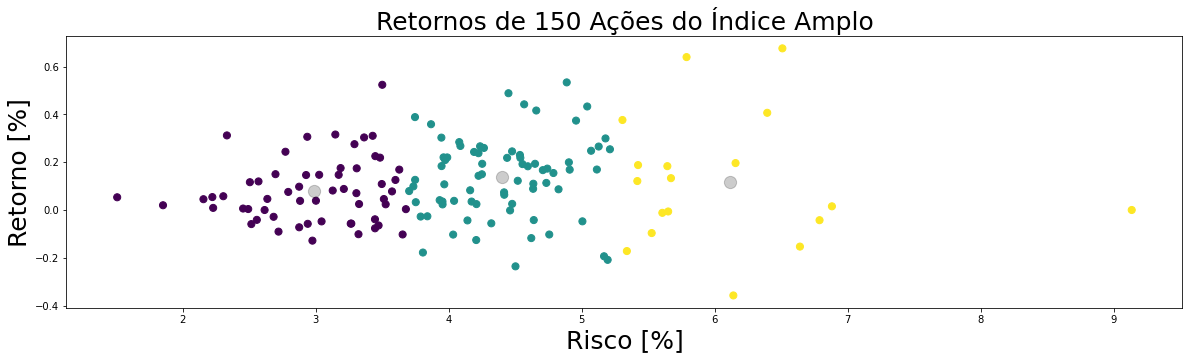

In [7]:
retornos=100*output[list(set(stocks)-set(['TCSA3','HBOR3']))].pct_change()
stocks=retornos.columns

X=np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])

N=3

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=25)
ax1.set_xlabel('Risco [%]',fontsize=25)
ax1.set_ylabel('Retorno [%]',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

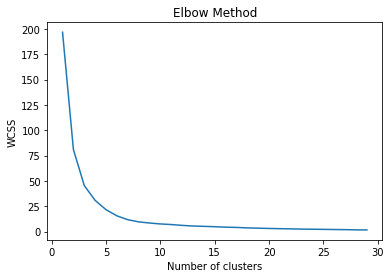

In [8]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Ativos com Melhor Relação em Cada Cluster: ['VVAR3', 'WEGE3', 'MGLU3', 'CAML3']


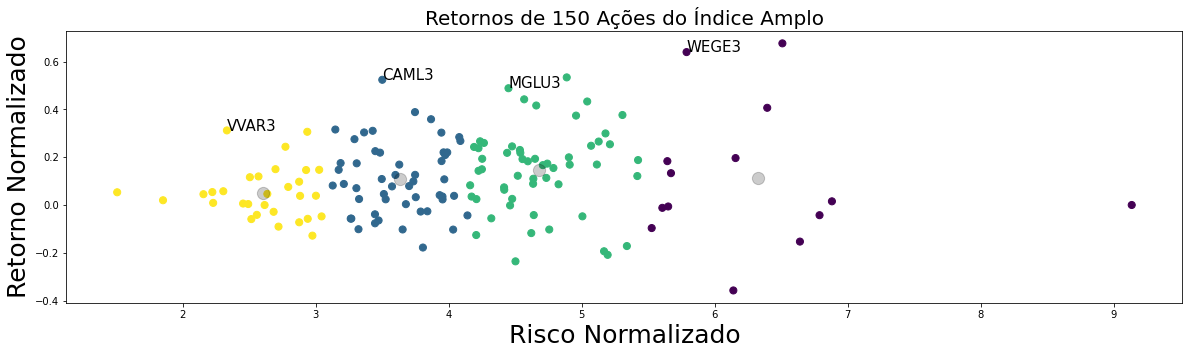

In [9]:
retornos=output[list(set(stocks)-set(['TCSA3','HBOR3']))].pct_change()
stocks=retornos.columns


X=100*np.array([[np.std(retornos[st]),np.mean(retornos[st])] for st in stocks])
#X = StandardScaler().fit_transform(X)

N=4

kmeans = KMeans(n_clusters=N, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)

fig = plt.subplots(figsize=(20,5))

ax1=plt.subplot(1,1, 1) 
ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
ax1.set_title('Retornos de '+str(len(stocks))+' Ações do Índice Amplo',fontsize=20)
ax1.set_xlabel('Risco Normalizado',fontsize=25)
ax1.set_ylabel('Retorno Normalizado',fontsize=25)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.2);

best=[]
for i in range(N):
    ind=retornos[retornos.columns[np.where(y_kmeans==i)[0]]].mean()/retornos[retornos.columns[np.where(y_kmeans==i)[0]]].std()
    best.append(ind[ind==np.max(ind)])
rb=list(pd.DataFrame(best).columns)
print("Ativos com Melhor Relação em Cada Cluster:", rb)

for pos, st in zip(X[np.where(stocks.isin(rb))],rb):
    plt.text(pos[0],pos[1],st,fontsize=15)

<b>Fim da Atividade!!!</b> 
